In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geoplot
import geoplot.crs as gcrs
from pypalettes import load_cmap
from highlight_text import fig_text
from pyfonts import load_font

proj = ccrs.Mercator()

df = pd.read_csv('growth-rate-pop.csv')
df = df.groupby(by='Country')['Growth Rate'].mean().reset_index()
df = df.replace('United States', 'United States of America')
world = gpd.read_file("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/all_world.geojson")
world = world.merge(df, right_on='Country', left_on='name', how='inner')
world = world.to_crs(proj.proj4_init)
world.head()

,name,geometry,Country,Growth Rate
0,Tanzania,"POLYGON ((3774143.866 -105050.440, 3792946.708...",Tanzania,0.048567
1,Canada,"MULTIPOLYGON (((-13674486.249 6242596.000, -13...",Canada,0.010267
2,United States of America,"MULTIPOLYGON (((-13674486.249 6242596.000, -13...",United States of America,-0.000888
3,Kazakhstan,"POLYGON ((9724867.413 6279047.498, 9640131.701...",Kazakhstan,0.020633
4,Uzbekistan,"POLYGON ((6230350.563 5029760.556, 6225978.591...",Uzbekistan,0.011700


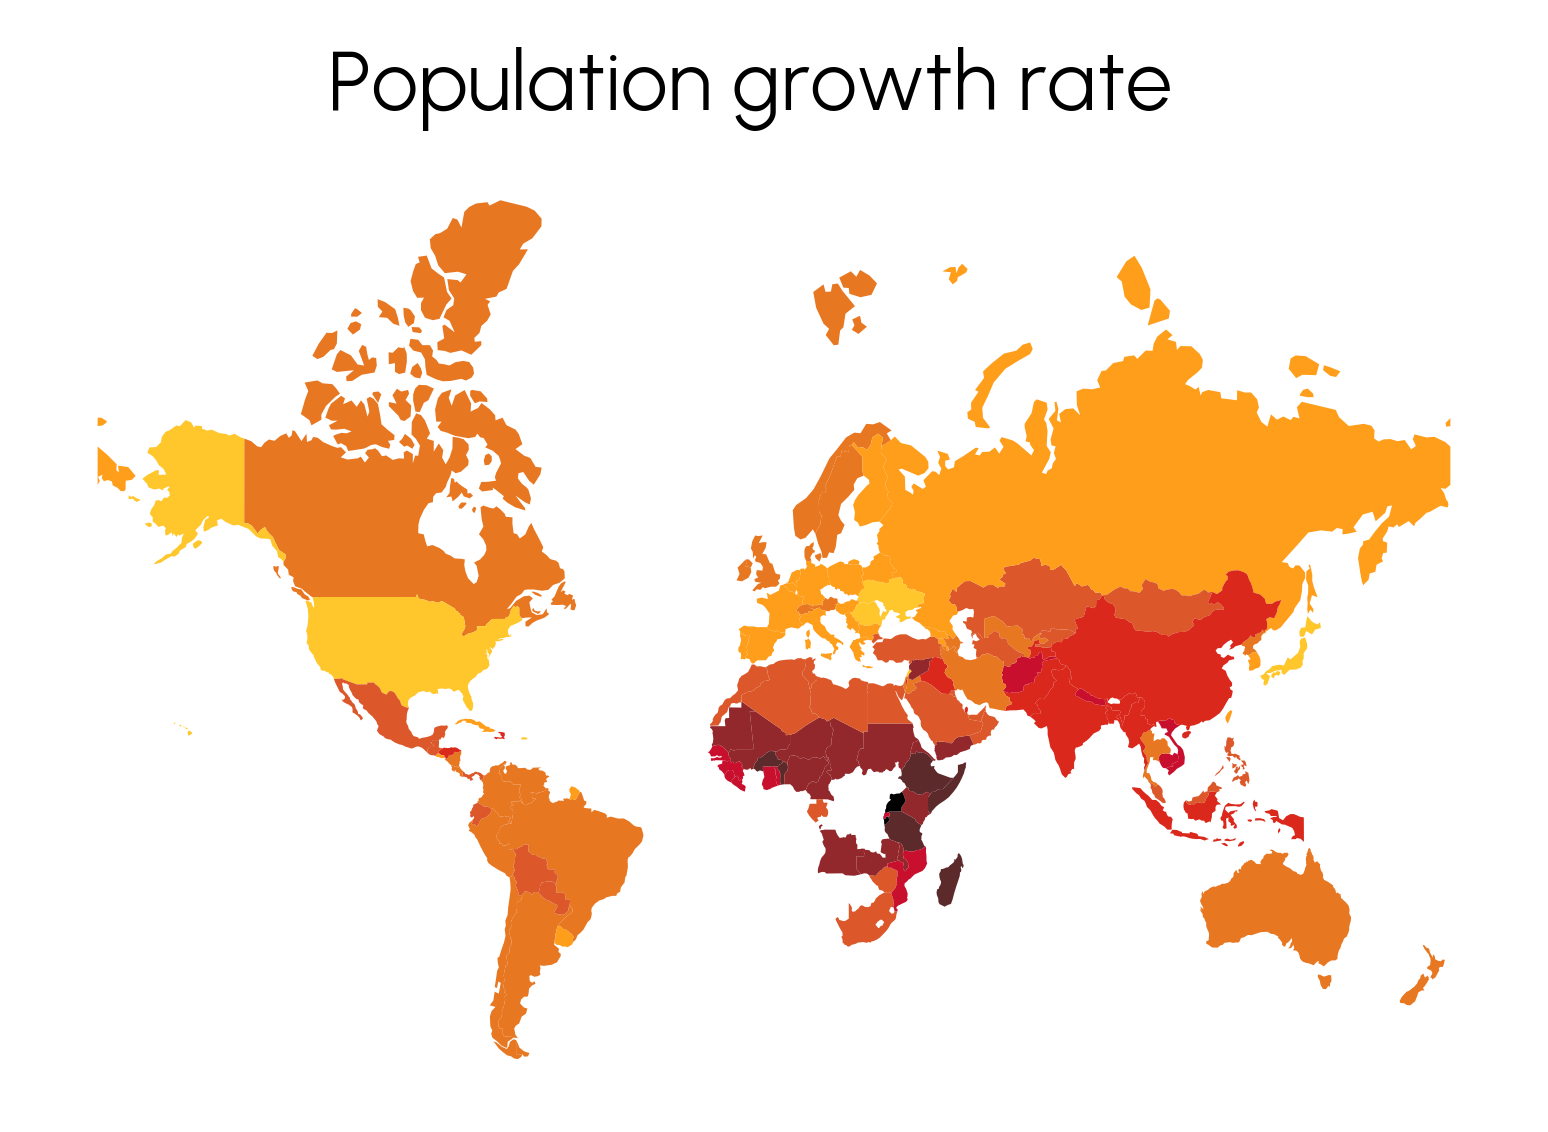

In [4]:
fig, ax = plt.subplots(dpi=300)

cmap = load_cmap("jazz_city", reverse=True)
world.plot(ax=ax, column='Growth Rate', cmap=cmap)
ax.set_axis_off()

font = load_font(
   "https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Light.ttf?raw=true"
)
fig_text(
   x=0.5, y=0.9, s="Population growth rate", ha='center', va='top',
   font=font, fontsize=20
)

plt.show()